In [6]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


whitewine = pd.read_csv('winequality-white.csv', sep=';')
whitewine.head()
whitewine.info()
whitewine.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.0            0.15              0.28         14.7            0.051      29.0                 149.0                 0.99792  2.96  0.39       9.0      7          8
7.3            0.19              0.27         13.9            0.057      45.0                 155.0                 0.99807  2.94  0.41       8.8      8          8
7.4            0.16              0.30         13.7            0.056      33.0                 168.0                 0.99825  2.90  0.44       8.7      7          7
6.8            0.18              0.30         12.8            0.062      19.0                 171.0                 0.99808  3.00  0.52       9.0      7          7
7.4            0.19              0.30         12.8            0.053      48.5                 229.0                 0.99860  3.14  0.49       9.1      7          6
                     

In [14]:
# make a copy of the data

whitewine_copy = whitewine.copy() 

#create a new column called 'quality_label' and assign the value based on the 'quality' column  value
# 0-4 = 'low'   5-6 = 'medium'   7-10 = 'high'  
whitewine_copy['quality_label'] = whitewine_copy['quality'].apply(lambda value: 'low' if value <= 4 else 'medium' if value <= 6 else 'high')

whitewine_copy.head()

#coun the number of each quality label
whitewine_copy['quality_label'].value_counts()

quality_label
medium    3655
high      1060
low        183
Name: count, dtype: int64

In [15]:
#drop the 'quality' column
whitewine_copy = whitewine_copy.drop(columns='quality')
whitewine_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium


In [16]:
from sklearn.preprocessing import OrdinalEncoder

# Create encoder for quality
ord_encoder = OrdinalEncoder(categories=[["low", "medium", "high"]])  

# Create new column for encoded quality values
whitewine_copy['quality_label_encoded'] = ord_encoder.fit_transform(
whitewine_copy[['quality_label']]
)

print("Original quality labels:", whitewine_copy['quality_label'].unique())
print("Encoded quality labels:", whitewine_copy['quality_label_encoded'].unique())

Original quality labels: ['medium' 'high' 'low']
Encoded quality labels: [1. 2. 0.]


Split the Data

In [17]:
#importing train_test_split and GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV

X = whitewine_copy.drop(['quality_label', 'quality_label_encoded'], axis=1) #features
y = whitewine_copy['quality_label_encoded'] #target - using encoded version for modeling

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0.8653061224489796


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

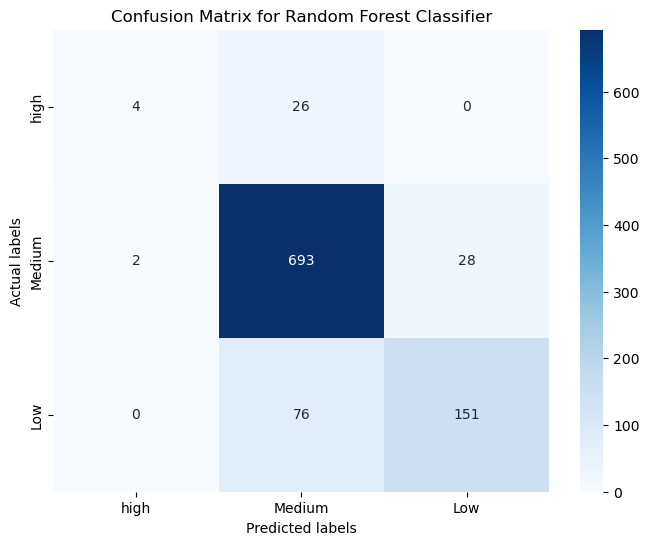

In [ ]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier as randomforestclassifier


#initializing the model
RF_model = randomforestclassifier(random_state=42)

#fitting the model
RF_model.fit(X_train, y_train)

# Prediction
preds = RF_model.predict(X_test) #predicting
X_test
y_test

# accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #importing necessary metrics
acc = accuracy_score(y_test, preds) #accuracy
print(acc) #accuracy

classification_report(y_test, preds) #classification report
#create a confusion matrix

conf_matrix = confusion_matrix(y_test, preds)

#create a visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['high', 'Medium', 'Low'],
            yticklabels=['high', 'Medium', 'Low'])  
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix for Random Forest Classifier')



In [14]:
#print the classification report
print(classification_report(y_test, preds))

#print confusion matrix
print(conf_matrix)

#print accuracy
print(acc)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.89      0.96      0.92       262
         2.0       0.70      0.55      0.62        47

    accuracy                           0.87       320
   macro avg       0.53      0.50      0.51       320
weighted avg       0.83      0.87      0.85       320

[[  0  11   0]
 [  0 251  11]
 [  0  21  26]]
0.865625


/opt/anaconda3/envs/CAB_V1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/CAB_V1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/CAB_V1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy Score: 0.8245

Classification Report:
              precision    recall  f1-score   support

         0.0       0.36      0.53      0.43        30
         1.0       0.91      0.85      0.88       723
         2.0       0.68      0.78      0.73       227

    accuracy                           0.82       980
   macro avg       0.65      0.72      0.68       980
weighted avg       0.84      0.82      0.83       980



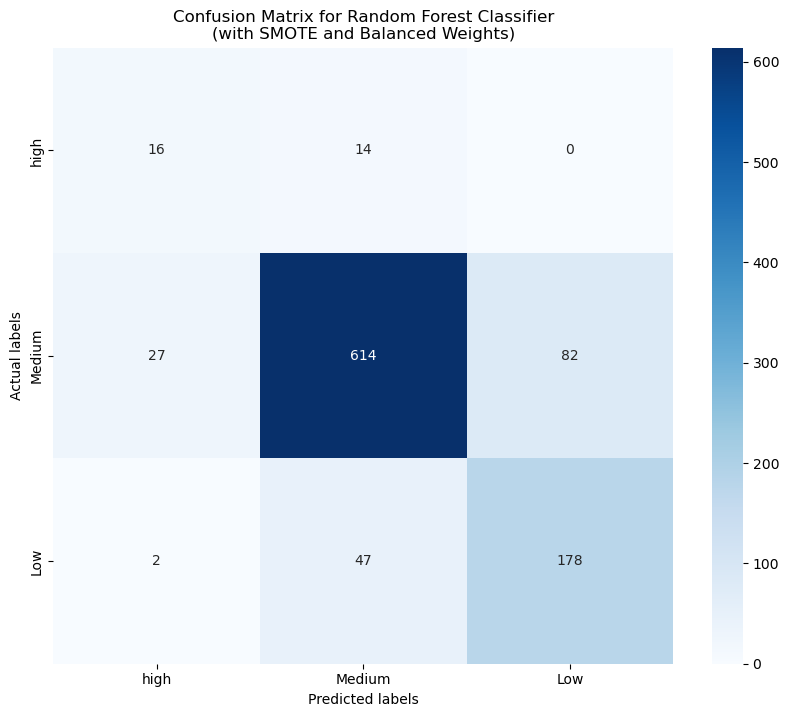

In [ ]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize the model with improved parameters
RF_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

# Fit the model on balanced data
RF_model.fit(X_train_balanced, y_train_balanced)

# Prediction
preds = RF_model.predict(X_test)

# Calculate and print accuracy
acc = accuracy_score(y_test, preds)
print(f"Accuracy Score: {acc:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, preds))

# Create and plot confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['high', 'Medium', 'Low'],
            yticklabels=['high', 'Medium', 'Low'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix for Random Forest Classifier\n(with SMOTE and Balanced Weights)')
plt.show()


Training model with GridSearchCV...

Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.9041539828693441

Accuracy Score: 0.8133

Classification Report:
              precision    recall  f1-score   support

         0.0       0.30      0.43      0.36        30
         1.0       0.90      0.84      0.87       723
         2.0       0.67      0.78      0.72       227

    accuracy                           0.81       980
   macro avg       0.62      0.68      0.65       980
weighted avg       0.83      0.81      0.82       980



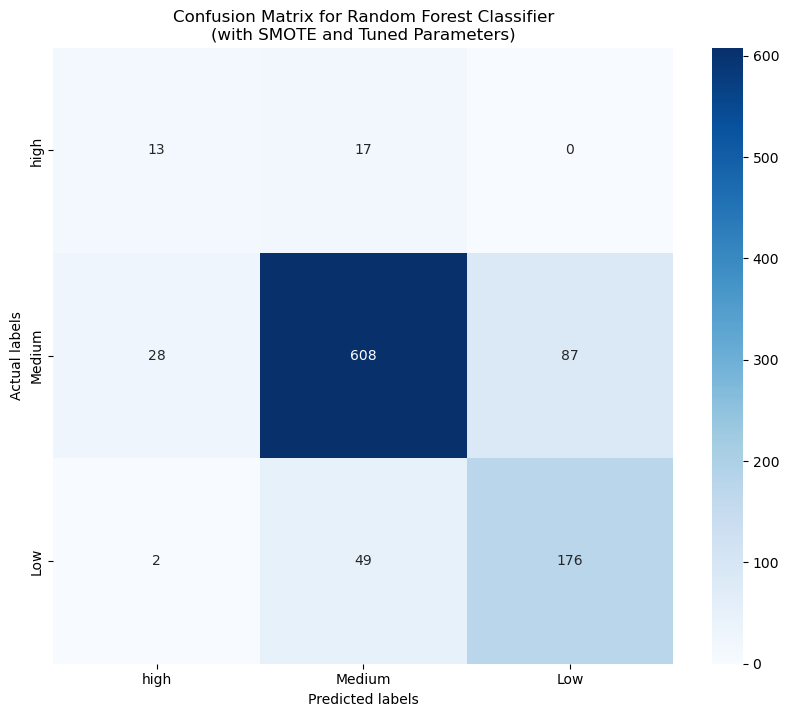


Top 5 Most Important Features:
                 feature  importance
5    free sulfur dioxide    0.153980
10               alcohol    0.135333
1       volatile acidity    0.111082
6   total sulfur dioxide    0.102910
7                density    0.088256


In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [15, 20],
    'min_samples_split': [5, 10],
    'class_weight': ['balanced']
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # Reduced from 5 to 3
    scoring='balanced_accuracy',
    n_jobs=-1
)

# Fit the model
print("Training model with GridSearchCV...")
grid_search.fit(X_train_balanced, y_train_balanced)

# Print best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use best model for predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Create and plot confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['high', 'Medium', 'Low'],
            yticklabels=['high', 'Medium', 'Low'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix for Random Forest Classifier\n(with SMOTE and Tuned Parameters)')
plt.show()

# Print top 5 most important features
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
})
print("\nTop 5 Most Important Features:")
print(feature_importance.sort_values('importance', ascending=False).head())